In [1]:
import imp
import hydra.experimental
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
tf.enable_eager_execution()

import precog.bijection.bijection_helpers as bijection_helpers
import precog.esp_train as esp_train
import precog.utils.rand_util as randu
import precog.plotting.plot as plot

# import precog.dataset.trimodal_dataset as tri_dataset
# import precog.dataset.serialized_dataset as dill_dataset
# import precog.utils.tfutil as tfu
# import precog.utils.similarity_util as similarityu
%matplotlib inline

/home/nrhinehart/pre3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nrhinehart/pre3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nrhinehart/pre3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nrhinehart/pre3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

Please go to this URL and finish the authentication flow: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=726169113324-1lqfthhss973l384522ilmffhe5to72u.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fspreadsheets+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=8V7dYekjDHmP9nRIgixOjSfUyJnz8B&prompt=consent&access_type=offline
Enter the authorization code: 4/yQEKKyYDJz07O6Evw45XaMYJqW3aCFn7023BNnP0e7WV83U6u3Ywa9Q


In [2]:
xx,yy = np.meshgrid(np.arange(100),np.arange(100))

In [3]:
feature_map = np.stack((xx,yy),axis=-1)[None]
feature_map = np.concatenate((feature_map, np.linalg.norm(feature_map,axis=-1)[...,None]), axis=-1)
feature_map = (feature_map / feature_map.ptp()) * 255

In [4]:
grid_x = np.random.randint(100, size=(30,))
grid_y = np.random.randint(100, size=(30,))

In [5]:
colors_original = feature_map[0, grid_y.ravel(), grid_x.ravel()]

In [6]:
coords = np.stack((grid_x.ravel(), grid_y.ravel()),axis=-1).astype(np.float32)

In [7]:
colors_interp = bijection_helpers.get_map_feats(feature_map,
                                                batch_shape=(1,), 
                                                batch_size=grid_x.size,
                                                A=1,
                                                last_agent_positions_grid=coords[None,None])[:,0].numpy()

[0, 100, 100, 0]

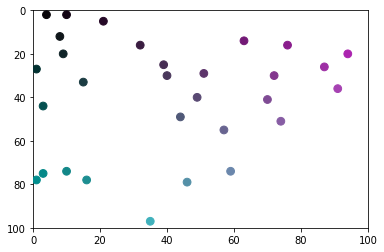

In [8]:
plt.scatter(grid_x.ravel(),grid_y.ravel(),
            color=(colors_original / 255).tolist(),zorder=100,s=60,
            linewidth=1)
plt.axis([0, 100, 100, 0])

[0, 100, 100, 0]

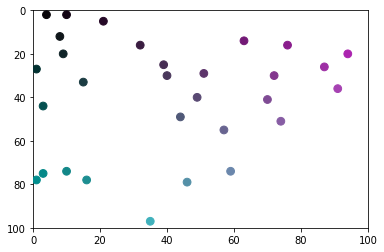

In [9]:
plt.scatter(grid_x.ravel(),grid_y.ravel(),
            color=(colors_interp / 255).tolist(),zorder=100,s=60,
            linewidth=1)
plt.axis([0, 100, 100, 0])